## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as sts
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_tumor_data_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")

# Display the data table for preview

mouse_tumor_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

mice_df = len(mouse_tumor_data_df["Mouse ID"].unique())

total_mice_df = pd.DataFrame({"Number of Mice": [mice_df]})

total_mice_df

,Number of Mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_revise_df = mouse_tumor_data_df.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='first')

mice_revise_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_df = mice_revise_df.groupby("Drug Regimen")

tumor_volume_df = drug_regimen_df["Tumor Volume (mm3)"]

tumor_volume_df

tumor_mean_df = drug_regimen_df["Tumor Volume (mm3)"].mean()

tumor_mean_df

tumor_median_df = drug_regimen_df["Tumor Volume (mm3)"].median()

tumor_median_df

tumor_variance_df = drug_regimen_df["Tumor Volume (mm3)"].var()

tumor_variance_df

tumor_std_df = drug_regimen_df["Tumor Volume (mm3)"].std()

tumor_std_df

tumor_sem_df = drug_regimen_df["Tumor Volume (mm3)"].sem()

tumor_sem_df


drug_stats_df = pd.DataFrame({"Tumor Volume Mean": tumor_mean_df,
                             "Tumor Volume Median": tumor_median_df,
                             "Tumor Volume Variance": tumor_variance_df,
                             "Tumor Volume STD": tumor_std_df,
                             "Tumor Volume SEM": tumor_sem_df})

drug_stats_df



,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [5]:
# Using the aggregation method, produce the same summary statistics in a single line

drug_agg_math = {"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']}

mice_revise_df.groupby(['Drug Regimen']).agg(drug_agg_math)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

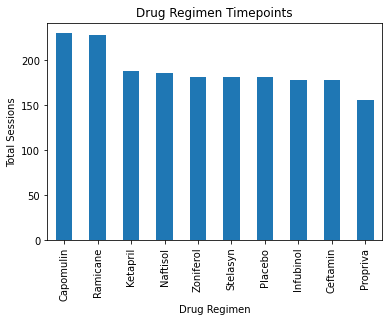

In [6]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_timepoints = mice_revise_df['Drug Regimen'].value_counts()

timepoint_chart = drug_timepoints.plot(kind='bar')

plt.title("Drug Regimen Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Sessions")

plt.show()

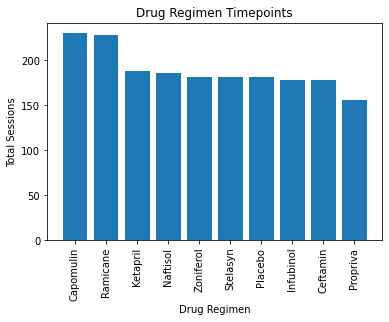

In [7]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drugs = mice_revise_df['Drug Regimen'].value_counts()
sessions = mice_revise_df['Drug Regimen'].value_counts().keys()

plt.title("Drug Regimen Timepoints")
plt.ylabel("Total Sessions")
plt.xlabel("Drug Regimen")

plt.bar(sessions, drugs)

plt.xticks(rotation=90)

plt.show()

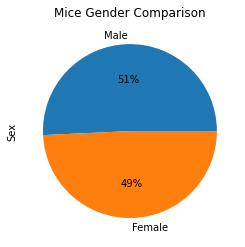

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender = mice_revise_df['Sex'].value_counts()

gender_chart = mice_gender.plot(kind='pie', autopct='%1.0f%%')

plt.title("Mice Gender Comparison")
plt.ylabel("Sex")

plt.show()


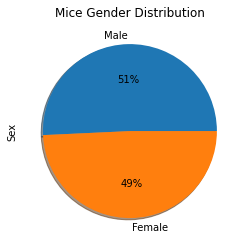

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice = mice_revise_df['Sex'].value_counts()
gender = mice_revise_df['Sex'].value_counts().keys()

plt.title("Mice Gender Distribution")
plt.ylabel("Sex")

plt.pie(mice, labels=gender, autopct="%1.0f%%", shadow=True)


plt.show()

## Quartiles, Outliers and Boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_time_df = mice_revise_df.groupby(['Mouse ID'])['Timepoint'].max()

max_time_df = max_time_df.reset_index()

max_time_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_mouse_df = pd.merge(max_time_df, mice_revise_df, on=['Mouse ID', 'Timepoint'], how='left')

merged_mouse_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [11]:
# Put treatments into a list for for loop (and later for plot labels)

regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_data = []

for regimen in regimens:
    
    tumor_vol = merged_mouse_df.loc[merged_mouse_df["Drug Regimen"]==regimen]["Tumor Volume (mm3)"]
    
    tumor_data.append(tumor_vol)
    
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print("----------------")
    
    print(f"The lower quartile of {regimen} is: {lowerq}")
    print(f"The upper quartile of {regimen} is: {upperq}")
    print(f"The interquartile range of {regimen} is: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    
# Calculate the IQR and quantitatively determine if there are any potential outliers
    

# Determine outliers using upper and lower bounds

----------------
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
----------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
----------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
----------------
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
Values below 25.355449580000

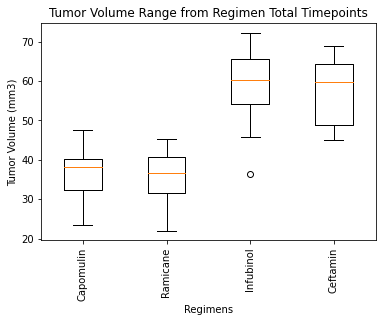

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_data, labels = regimens)

plt.xticks(rotation=90)

plt.title("Tumor Volume Range from Regimen Total Timepoints")
plt.xlabel('Regimens')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

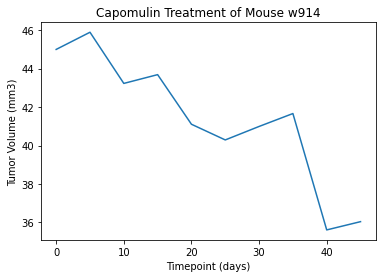

In [13]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Mouse ID: w914


capomulin_mouse = mice_revise_df.loc[(mice_revise_df['Mouse ID'] =='w914') & (mice_revise_df['Drug Regimen'] =='Capomulin')]

plt.plot(capomulin_mouse['Timepoint'],capomulin_mouse['Tumor Volume (mm3)'])
plt.title("Capomulin Treatment of Mouse w914")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

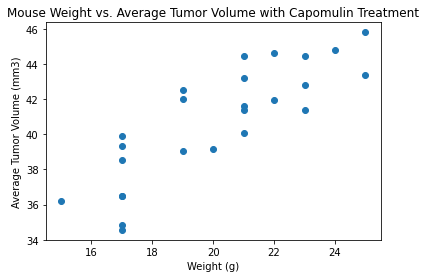

In [14]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_data = mice_revise_df.loc[(mice_revise_df['Drug Regimen'] =='Capomulin')]

capomulin_mice = capomulin_data.groupby('Mouse ID').mean()


plt.scatter(capomulin_mice['Weight (g)'],capomulin_mice['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume with Capomulin Treatment')
plt.show()

## Correlation and Regression

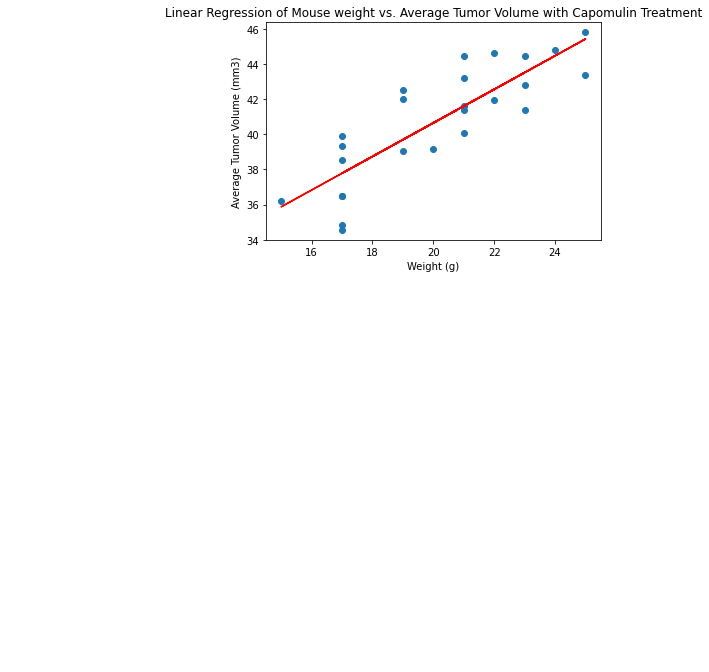

The correlation between mouse weight and average tumor volume is 0.84


In [15]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capomulin_mice['Weight (g)']
y_values = capomulin_mice['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Linear Regression of Mouse weight vs. Average Tumor Volume with Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

correlation = st.pearsonr(capomulin_mice['Weight (g)'],capomulin_mice['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
